# import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

import stock

%matplotlib inline

In [ ]:
importlib.reload(stock)

# _csvフォルダ内の価格データ一覧をリスト化

In [2]:
# _csvフォルダ内のファイル一覧をリスト化
csv_table = os.listdir('/Users/Really/Stockyard/_csv')
csv_table[:10], csv_table[-10:], len(csv_table)

(['.DS_Store',
  'all_stock_table.csv',
  'all_stock_table_1710.csv',
  'discontinued_stock_table.csv',
  'domestic_stock_table.csv',
  'ex_stock_table.csv',
  'info.csv',
  'keep_info.csv',
  't_1301.csv',
  't_1305.csv'],
 ['t_9989.csv',
  't_9990.csv',
  't_9991.csv',
  't_9992.csv',
  't_9993.csv',
  't_9994.csv',
  't_9995.csv',
  't_9996.csv',
  't_9997.csv',
  'yahoo_stock_table.csv'],
 3876)

## 価格データのファイル一覧を作成

### Regexオブジェクトを事前に作成する書き方

In [16]:
r = re.compile(r't_\d*.csv')
r

re.compile(r't_\d*.csv', re.UNICODE)

In [30]:
csv_table = [x for x in csv_table if r.match(x)]
csv_table[:10], csv_table[-10:], len(csv_table)

(['t_1301.csv',
  't_1305.csv',
  't_1306.csv',
  't_1308.csv',
  't_1309.csv',
  't_1310.csv',
  't_1311.csv',
  't_1312.csv',
  't_1313.csv',
  't_1314.csv'],
 ['t_9987.csv',
  't_9989.csv',
  't_9990.csv',
  't_9991.csv',
  't_9992.csv',
  't_9993.csv',
  't_9994.csv',
  't_9995.csv',
  't_9996.csv',
  't_9997.csv'],
 3867)

### Regexオブジェクトを事前作成しない書き方

In [13]:
csv_table = [i for i in csv_table if re.search(r't_\d*.csv', x)]
csv_table[:10], csv_table[-10:], len(csv_table)

(['t_1301.csv',
  't_1305.csv',
  't_1306.csv',
  't_1308.csv',
  't_1309.csv',
  't_1310.csv',
  't_1311.csv',
  't_1312.csv',
  't_1313.csv',
  't_1314.csv'],
 ['t_9987.csv',
  't_9989.csv',
  't_9990.csv',
  't_9991.csv',
  't_9992.csv',
  't_9993.csv',
  't_9994.csv',
  't_9995.csv',
  't_9996.csv',
  't_9997.csv'],
 3867)

## 上記のリスト内包表記について

https://qiita.com/y__sama/items/a2c458de97c4aa5a98e7  

### 基本構文 [counter for counter in iterator]  

In [ ]:
# 通常のリスト生成
extension_1 = []
for i in range(10):
    extension_1.append(i)
extension_1

In [11]:
# extension_1と同等のリストを内包表記で生成する場合は 
comprehension_1= [i for i in range(10)]
comprehension_1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

先に [i for i in] だけ書いてから修飾することが多い  
リスト内包表記はコードがすっきりするだけでなく速度面でも有利

### ifを含む場合(後置if)

In [ ]:
extension_2 =[]
for i in range(10):
    if i%2==0:
        extension_2.append(i)
extension_2

pythonには後置if文がありませんが、リスト内包表記に限っては（結果的にですが）書けます。  
extension_2をリスト内包表記で書きなおすと下記のような感じです。  
結果的に後置ifの構文になっていますが、これは内包表記ではfor節の後にif節やfor節がつなげられるためです。  
(コロンとインデントを省略できると思えばよい。)

In [10]:
comprehension_2 = [i for i in range(10) if i%2==0]
comprehension_2

[0, 2, 4, 6, 8]

# 日付とデータの欠損埋め、加工データの追加、保存

In [57]:
for file_name in range(len(csv_table)):
    price_table = pd.read_csv('/Users/Really/Stockyard/_csv/{0}'.format(csv_table[file_name]), index_col='Date')
    price_table.index = pd.to_datetime(price_table.index)
    price_table = stock.complement_price(price_table)
    price_table = stock.add_processed_price(price_table)
    
    price_table.to_csv('/Users/Really/Stockyard/_csv_processed/{0}_p.csv'.format(csv_table[file_name].split('.')[0]))

# プロットしてみる

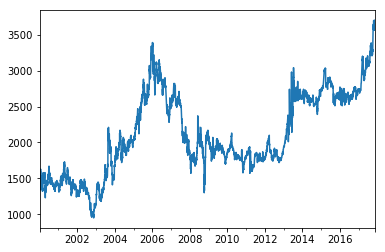

In [40]:
df_price_fill['AdjClose'].plot()

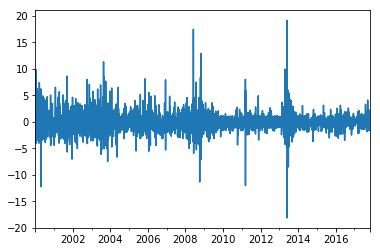

In [41]:
df_price_fill['log_return_oc'].plot()